<a href="https://colab.research.google.com/github/xMCTH/DSFMCTH/blob/main/07_ScyPy_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint # get youself an overview of the methods in scipy.integrate
import matplotlib.pyplot as plt

## Simple ODE

Solve the following ODE
$$ \frac{dy}{dt} = ye^{-t}$$
from $t_0=0$ to t=6 with the initial condition $y_0 = y(t_0)= 1$. Plot the resulting function $y(t)$.

In [ ]:
 def f(y,t):
   dydt = y * np.exp(-t)
   return dydt

 t = np.linspace(0,6)
 y0 = 1.0
 y = odeint(f,y0,t)
 print(y)

[[1.        ]
 [1.12215284]
 [1.24261203]
 [1.3599266 ]
 [1.47292262]
 [1.58069959]
 [1.68261258]
 [1.77824531]
 [1.86737861]
 [1.94995736]
 [2.02605862]
 [2.09586192]
 [2.15962297]
 [2.21765106]
 [2.27029015]
 [2.31790345]
 [2.36086127]
 [2.39953157]
 [2.43427295]
 [2.46542958]
 [2.49332776]
 [2.5182738 ]
 [2.54055286]
 [2.56042856]
 [2.57814321]
 [2.59391843]
 [2.60795604]
 [2.62043915]
 [2.6315334 ]
 [2.6413882 ]
 [2.65013801]
 [2.65790358]
 [2.66479315]
 [2.67090359]
 [2.67632149]
 [2.68112415]
 [2.68538049]
 [2.68915192]
 [2.69249312]
 [2.69545271]
 [2.69807392]
 [2.70039516]
 [2.70245054]
 [2.70427035]
 [2.70588145]
 [2.70730768]
 [2.70857016]
 [2.70968763]
 [2.7106767 ]
 [2.71155208]]


Text(0, 0.5, 'y(t)')

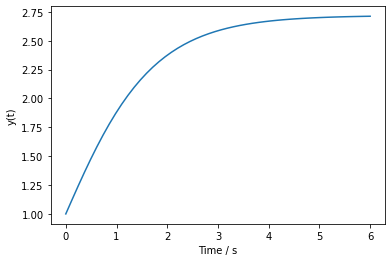

In [ ]:
 plt.plot(t,y)
 plt.xlabel('Time / s')
 plt.ylabel('y(t)')

## Set of two ODE

We have the first order reaction $A \rightarrow B$. The reaction rate is given by
$$ \frac{dC_A}{dt} = -kC_A $$
where $k = 2.0$ and the initial concentration $C_A(t=0)=1.0$. The product composition $C_B$ is described by
$$\frac{dC_B}{dt} = k C_A$$
Solve the equations and plot $C_A$ and $C_B$ versus time in the same figure.

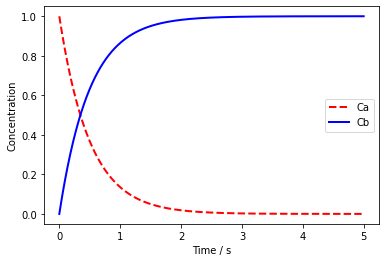

In [ ]:
 def rnx(C,t):
   Ca = C[0]
   Cb = C[1]
   k  = 2.0
   dAdt = -k * Ca
   dBdt =  k * Ca
   return [dAdt,dBdt]
 t  = np.linspace(0,5,1000)
 C0 = [1,0]
 C  = odeint(rnx,C0,t)
 plt.plot(t,C[:,0], 'r--',linewidth=2.0)
 plt.plot(t,C[:,1], 'b-',linewidth=2.0)
 plt.xlabel('Time / s')
 plt.ylabel('Concentration')
 plt.legend(['Ca','Cb'])

## Set of four ODE

We are performing the following chemical reactions.
$$ Rxn\, 1: A + B \rightarrow C $$
$$ Rxn\, 2: B + C \rightarrow D $$
A, B, C and D denote the species concentrations in mol/L. Let the initial concentrations be $A_0=1$, $B_0=1$, $C_0=$ and $D_0=0$. $k_1=1$, $k_2=1.5 L/Mol*s$.

Plot the concentrations if A, B, C and D as functions of time for $t = [0,3]$ with $\Delta t = 0.2$s. Also plot the selectivity defined as $S=C/(C+D)$ with $S(t_0)=1$. 

The ordinary differential equations:
$$\frac{dA}{dt} = -k_1 C_A C_B$$
$$\frac{dB}{dt} = -k_1 C_A C_B - k_2 C_B C_C$$
$$\frac{dC}{dt} = k_1 C_A C_B - k_2 C_B C_C$$
$$\frac{dD}{dt} = k_2 C_B C_C$$




<ipython-input-8-a0ff83ac4dfd>:20: RuntimeWarning: invalid value encountered in true_divide
  S = cC / (cC+cD)


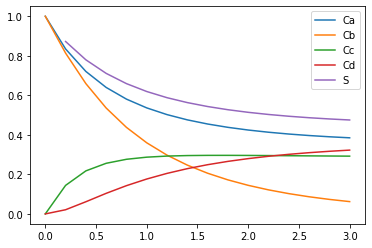

In [ ]:
 def rxn(Z,t):
   k1 = 1
   k2 = 1.5
   r1 = k1 * Z[0]*Z[1]
   r2 = k2 * Z[1]*Z[2]
   dAdt = -r1
   dBdt = -r1 - r2
   dCdt = r1 - r2
   dDdt = r2
   return [dAdt,dBdt,dCdt,dDdt]

 t  = np.linspace(0,3,16)
 Z0 = [1,1,0,0]
 Conc = odeint(rxn,Z0,t)
 cA = Conc[:,0]
 cB = Conc[:,1]
 cC = Conc[:,2]
 cD = Conc[:,3]

 S = cC / (cC+cD)

 plt.plot(t, cA,label='Ca' )
 plt.plot(t, cB,label='Cb')
 plt.plot(t, cC, label='Cc')
 plt.plot(t, cD, label='Cd')
 plt.plot(t, S, label='S')
 plt.legend()